# 2

In [1]:
import numpy as np
import wooldridge as woo
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf

## PART 1

## Use the wage2 dataset from the Wooldridge python module to answer the following question. Import this data into your notebook.

In [2]:
wage = woo.data("wage2")
wage.head()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
0,769,40,93,35,12,11,2,31,1,0,0,1,1,2.0,8.0,8.0,6.645091
1,808,50,119,41,18,11,16,37,1,0,0,1,1,NaN,14.0,14.0,6.694562
2,825,40,108,46,14,11,9,33,1,0,0,1,1,2.0,14.0,14.0,6.715384
3,650,40,96,32,12,13,7,32,1,0,0,1,4,3.0,12.0,12.0,6.476973
4,562,40,74,27,11,14,5,34,1,0,0,1,10,6.0,6.0,11.0,6.331502


### Find the average IQ and salary in the sample. What is the sample standard deviation of IQ? (IQ scores are standardized in the population to have an average of 100 with a standard deviation of 15).

In [3]:
wage.describe()

,wage,hours,IQ,KWW,educ,exper,tenure,age,married,black,south,urban,sibs,brthord,meduc,feduc,lwage
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,852.000000,857.000000,741.000000,935.000000
mean,957.945455,43.929412,101.282353,35.744385,13.468449,11.563636,7.234225,33.080214,0.893048,0.128342,0.341176,0.717647,2.941176,2.276995,10.682614,10.217274,6.779004
std,404.360822,7.224256,15.052636,7.638788,2.196654,4.374586,5.075206,3.107803,0.309217,0.334650,0.474358,0.450385,2.306254,1.595613,2.849756,3.300700,0.421144
min,115.000000,20.000000,50.000000,12.000000,9.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.744932
25%,669.000000,40.000000,92.000000,31.000000,12.000000,8.000000,3.000000,30.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,6.505783
50%,905.000000,40.000000,102.000000,37.000000,12.000000,11.000000,7.000000,33.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,12.000000,10.000000,6.807935
75%,1160.000000,48.000000,112.000000,41.000000,16.000000,15.000000,11.000000,36.000000,1.000000,0.000000,1.000000,1.000000,4.000000,3.000000,12.000000,12.000000,7.056175
max,3078.000000,80.000000,145.000000,56.000000,18.000000,23.000000,22.000000,38.000000,1.000000,1.000000,1.000000,1.000000,14.000000,10.000000,18.000000,18.000000,8.032035


In [4]:
IQ_avg = wage.IQ.mean()
print("The average IQ in the sample is", IQ_avg)
IQ_std = np.std(wage.IQ, ddof=1) 
print("The IQ standard deviation is", IQ_std)
salary_avg = wage.wage.mean()
print("The average salary in the sample is", salary_avg)

The average IQ in the sample is 101.28235294117647
The IQ standard deviation is 15.0526363702651
The average salary in the sample is 957.9454545454546


### Estimate a regression model where a one-point increase in IQ changes wage by a constant dollar amount. Use this model to find the predicted increase in wage for an increase in IQ of 15 points. Does IQ explain most of the variation in wage?

In [5]:
nreg = smf.ols('wage ~ IQ', data=wage)
nresult = nreg.fit()
nresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     98.55
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           3.79e-22
Time:                        23:56:15   Log-Likelihood:                -6891.4
No. Observations:                 935   AIC:                         1.379e+04
Df Residuals:                     933   BIC:                         1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.9916     85.642      1.366      0.172     -51.081     285.064
IQ             8.3031      0.836      9.927      0.000       6.662       9.944
==============================================================================
Omnibus:                      208.281   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              532.184
Skew:                           1.157   Prob(JB):                    2.74e-116
Kurtosis:                       5.882   Cond. No.                         697.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
nb0 = nresult.params[0]
nb1 = nresult.params[1]
print("The estimated model is: Wage","=",nb0,"+",nb1,"* IQ")
print("For each unit increase of IQ, the salary raises of about", nb1, "dollars")
increase = nb1*15
print("Therefore, if the IQ increases of 15 units, the wage is expected to grow around", increase, "dollars")

The estimated model is: Wage = 116.9915647855688 + 8.30306430823444 * IQ
For each unit increase of IQ, the salary raises of about 8.30306430823444 dollars
Therefore, if the IQ increases of 15 units, the wage is expected to grow around 124.5459646235166 dollars


In [7]:
nresult.rsquared

0.09553528456778504

According to the R^2, the IQ explains only 10% of the wage variation. Hence, IQ is not a great indicator to predict salary changes.

### Estimate a model where each one-point increase in IQ has the same percentage effect on wage. If IQ increases by 15 points, what is the approximate percentage increase in wage?

In [8]:
reg = smf.ols('np.log(wage) ~ IQ', data=wage)
result = reg.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     102.6
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           5.93e-23
Time:                        23:56:15   Log-Likelihood:                -468.85
No. Observations:                 935   AIC:                             941.7
Df Residuals:                     933   BIC:                             951.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8870      0.089     66.131      0.000       5.712       6.062
IQ             0.0088      0.001     10.130      0.000       0.007       0.011
==============================================================================
Omnibus:                       32.293   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.621
Skew:                          -0.329   Prob(JB):                     1.24e-10
Kurtosis:                       3.859   Cond. No.                         697.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
b0 = result.params[0]
b1 = result.params[1]
print("The estimated model is: Log(Wage)","=",b0,"+",b1,"* IQ")
print("For each unit increase of IQ, the salary raises by", b1*100, "percent")
estimated_change = b1 * 15
print("Therefore, if the IQ increases of 15 units, the wage is expected to grow by", estimated_change*100, "percent")

The estimated model is: Log(Wage) = 5.8869942578500645 + 0.008807156409476217 * IQ
For each unit increase of IQ, the salary raises by 0.8807156409476217 percent
Therefore, if the IQ increases of 15 units, the wage is expected to grow by 13.210734614214326 percent


### Does the intercept in these models have a meaningful interpretation? Explain.

The intercept of the first model (b0=116.9916) can be interpreted as the estimated level of salary when the value of IQ is zero. Hence, when IQ is equal to zero, the salary is approximately 117. This has only a statistical meaning, as there is no real-word interpretation for it - hopefully IQ cannot be zero.

The intercept of the second model (b0=5.8870) can be interpretated as the log form of the geometric mean of the salaries, thus, exp(5.8869942578500645) = 360.320624. The geometric mean of the wages is approximately 360.

## PART 2

## Use the wage2 dataset from the Wooldridge python module to answer the following question. Use the regression from question (1) part (c) for any influence diagnostics.

### Generate a residuals plot. Include a lowess smoother in this plot. What do you observe about the residuals?

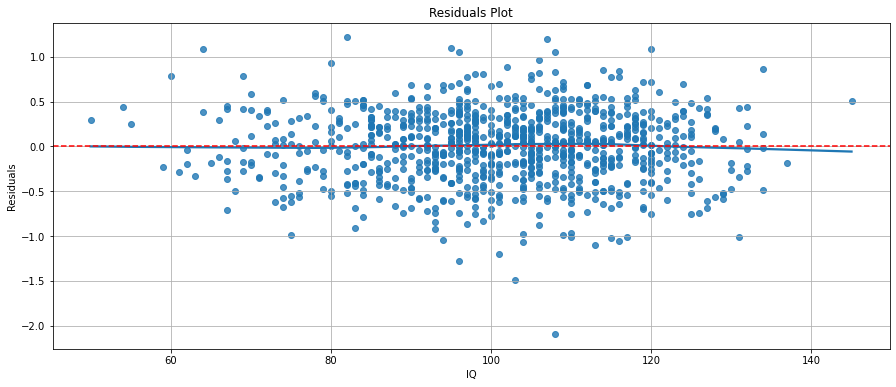

In [10]:
plt.figure(figsize = (15, 6))
sns.regplot(x = wage.IQ, y = result.resid, lowess = True)
plt.axhline(0, linestyle = '--', color = "red")
plt.ylabel("Residuals")
plt.xlabel("IQ")
plt.title("Residuals Plot")
plt.grid()
plt.show()

The residuals are generally scattered arount the 0 line. However, there are some outliers and leverages. The LOESS curve is basically a straight line on the 0 line, confirming that the residuals trend is to be clustered around the null value.

### Generate a Cook’s distance plot. Do you notice any unusual observations?

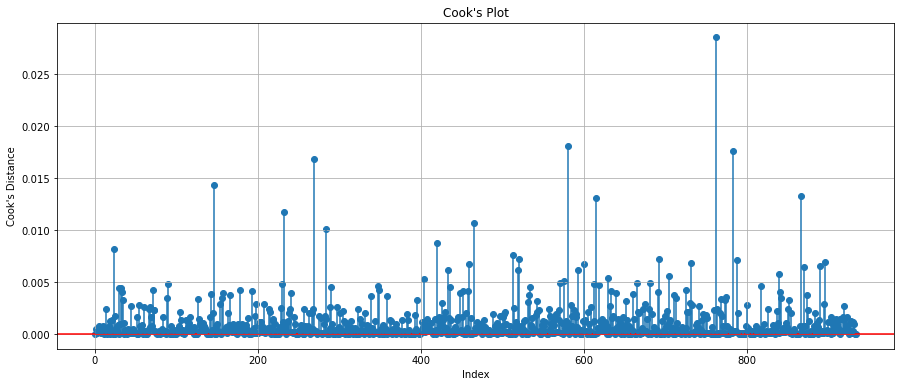

In [11]:
cooks_distance = result.get_influence().cooks_distance
plt.figure(figsize = (15, 6))
plt.scatter(wage.index, cooks_distance[0])
plt.axhline(0, color = 'red')
plt.vlines(x = wage.index, ymin = 0, ymax = cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title("Cook's Plot")
plt.grid()

Most part of the observations is plotted between values 0 and 0.003, while some other wide set is within 0.005. There are some suspect observations beyond 0.005, and 10 observations at or over the 0.01 level. Relatively speaking, the latter is likely to be classified as unusual and influential observations. 

### Visualize potential influential observations using DFFITS. Based on this plot, do any observations deserve additional scrutiny?

In [12]:
dffits, threshold = result.get_influence().dffits

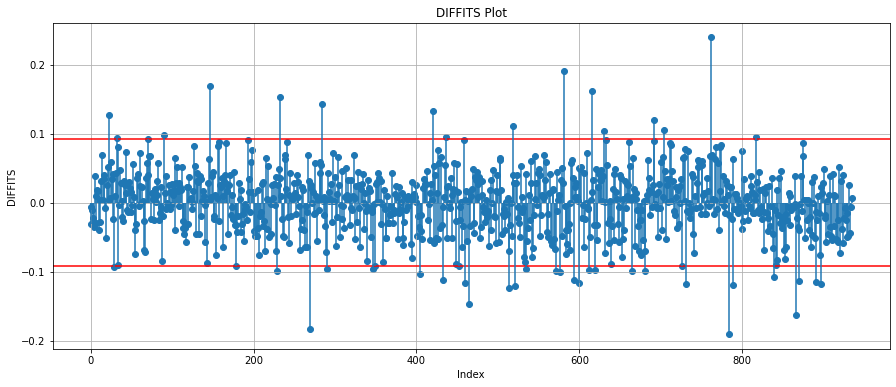

In [13]:
plt.figure(figsize = (15, 6))
plt.scatter(wage.index, dffits)
plt.axhline(threshold, color = 'red')
plt.axhline(-threshold, color = 'red')
plt.vlines(x = wage.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("DIFFITS Plot")
plt.grid()

For what it is observable from the graph above, 12 observations are over the positive threshold and around 26 observations cross the negative line - they deserve to be closely examinated. Moreover, there are also a few points standing on the border.

### Based on what we’ve learned in class, set a test threshold and remove suspected outliers using either studentized residuals, DFFITS, or Cook’s Distance as the criteria. Fit a regression on the new dataset.

In [14]:
wage2 = wage[np.abs(dffits)<threshold]

In [15]:
print("The wage dataset with outliers counted", wage.shape[0], "observations. The new database counts", wage2.shape[0], "observations.")
print("Therefore, the significant observations were", wage.shape[0]-wage2.shape[0])

The wage dataset with outliers counted 935 observations. The new database counts 891 observations.
Therefore, the significant observations were 44


In [16]:
reg2 = smf.ols('np.log(wage) ~ IQ', data=wage2)
result2 = reg2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     133.8
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           6.38e-29
Time:                        23:56:16   Log-Likelihood:                -335.20
No. Observations:                 891   AIC:                             674.4
Df Residuals:                     889   BIC:                             684.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8304      0.084     69.463      0.000       5.666       5.995
IQ             0.0095      0.001     11.566      0.000       0.008       0.011
==============================================================================
Omnibus:                        7.323   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.736
Skew:                          -0.163   Prob(JB):                       0.0345
Kurtosis:                       2.727   Cond. No.                         727.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Describe how the regression results changed. Are the regression parameters stable? Was the fit of your regression affected?

In [17]:
b0_2 = result2.params[0]
b1_2 = result2.params[1]

In [18]:
print("The estimated previous model was: Log(Wage)","=",b0,"+",b1,"* IQ")
print("The estimated new model is: Log(Wage)","=",b0_2,"+",b1_2,"* IQ")
print("Therefore, if the IQ increases of one unit, the wage is expected to grow by", b1_2 * 100,"%")

The estimated previous model was: Log(Wage) = 5.8869942578500645 + 0.008807156409476217 * IQ
The estimated new model is: Log(Wage) = 5.83035321739575 + 0.00948799996656422 * IQ
Therefore, if the IQ increases of one unit, the wage is expected to grow by 0.948799996656422 %


Without the influential observations, an increase in IQ is likely to increase wage by 0.95%, while with the influential observations, we could expect an increase in salaries of 0.88% after an unit raise in IQ. Hence, unusual observations were lowering the percentage increase of the wage - despite by a very small amount.

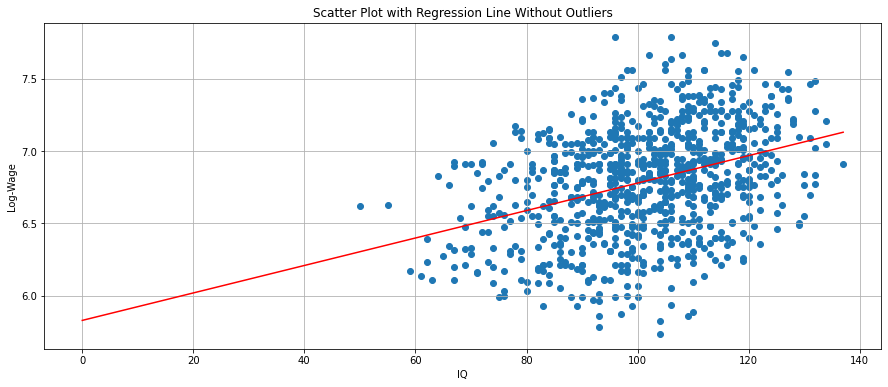

In [19]:
x_range = np.linspace(0, wage2.IQ.max(), 100)

plt.figure(figsize = (15, 6))
plt.scatter(wage2.IQ, np.log(wage2.wage))
plt.plot(x_range, b1_2*x_range+b0_2, color="red")
plt.title("Scatter Plot with Regression Line Without Outliers")
plt.ylabel("Log-Wage")
plt.xlabel("IQ")
plt.grid()

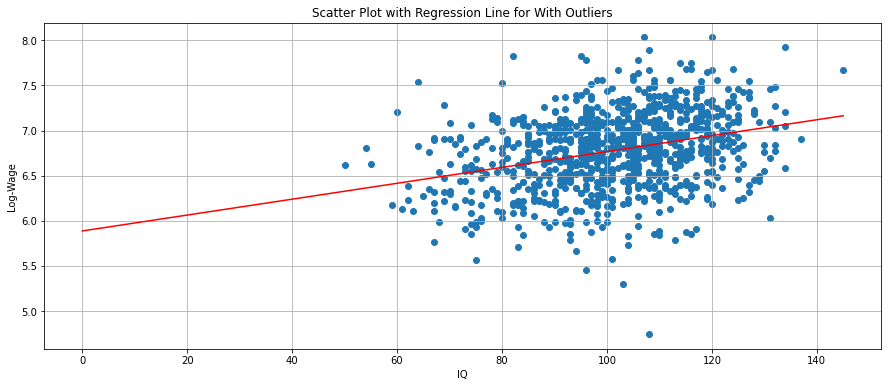

In [20]:
x_range = np.linspace(0, wage.IQ.max(), 100)

plt.figure(figsize = (15, 6))
plt.scatter(wage.IQ, np.log(wage.wage))
plt.plot(x_range, b1*x_range+b0, color="red")
plt.title("Scatter Plot with Regression Line for With Outliers")
plt.ylabel("Log-Wage")
plt.xlabel("IQ")
plt.grid()

In [21]:
print("The standard error for the log-linear regression with outliers was:")
print(result.bse)
print("The standard error for the log-linear regression without outliers is:")
print(result2.bse)

The standard error for the log-linear regression with outliers was:
Intercept    0.089021
IQ           0.000869
dtype: float64
The standard error for the log-linear regression without outliers is:
Intercept    0.083935
IQ           0.000820
dtype: float64


In general, when we remove outliers, we decrease parameter variance, and, thus, the standard error decreases. This increases coefficient stability. In this specific case, we originally had a dataset of 935 observations, from which we removed 44 significant values, resulting in a table made of 891 observations. It is hard to say whether such removal helped the regression become less unstable, as the data cut off the sample were only 44 out of 935. For sure, the model has improved, as we can also notice from the lowered SE values. However, if it has become more stable, the change is not clearly defined. It would be wiser to run a test.

In [23]:
import statsmodels
import statsmodels.api as sm
print(statsmodels.stats.diagnostic.breaks_cusumolsresid(result2.resid, ddof=2))
print("We reject parameters stability for alpha=0.05 and alpha=0.1")

(1.438441405329677, 0.03190207478121096, [(1, 1.63), (5, 1.36), (10, 1.22)])
We reject parameters stability for alpha=0.05 and alpha=0.1


In [26]:
print(statsmodels.stats.diagnostic.breaks_cusumolsresid(result2.resid, ddof=2))

(1.438441405329677, 0.03190207478121096, [(1, 1.63), (5, 1.36), (10, 1.22)])


In [24]:
print("For the previous log-linear regression, R^2 was", result.rsquared)
print("For the new log-linear regression, R^2 is", result2.rsquared)

For the previous log-linear regression, R^2 was 0.09909129613279599
For the new log-linear regression, R^2 is 0.13079856687116043


According to the results above, we can confirm that the new model has a better R^2. It is possible to state that the second model better explains the relationship between wage and IQ. Hence, the unusual observations we eliminated were actually significant.

### What are some potential concerns that might be balanced when deciding to remove influential observations?

It is important to remove outliers as they tend to change our sample estimates. Moreover, they tend to create skewness in the distribution of the observations. A single outlier can change the entire distribution and change model results. Especially, they tend to move the regression line towards them; the results would be biased and the regression variance would be higher - less stable. 

On the other hand, removing outliers when they form a wide part of the distribution may not be appropriate. Indeed, there is a chance that the distribution may change, so that the sample will no longer reflect the population. Also, if the sample is relatively small, removing outliers would decrease the size, even more, causing a shortage of data and, thus, an imprecise model. 